# Pack Stats

In [19]:
import pymc3 as pm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [3]:
packs_raw = pd.read_csv('./pack_stats.csv')
packs_raw.head()

,Date,Pack,AP/Creds,Notes,Uncommon,Rare Mod,Rare Weap.,Rare Char.,UR Weap.,UR Char.,UR Booster,Ultra Rares
0,2-Jul-17,Reserves,AP,Gold mod unfin.; Gold weap unfin; Gold char Un...,0,0,0,1,0,1,0,Angara Exemplar
1,2-Jul-17,Reserves,AP,Gold mod unfin.; Gold weap unfin; Gold char Un...,1,0,1,1,0,0,0,NaN
2,2-Jul-17,Reserves,AP,Gold mod unfin.; Gold weap unfin; Gold char Un...,0,0,0,2,0,0,0,NaN
3,2-Jul-17,Reserves,AP,Gold mod unfin.; Gold weap unfin; Gold char Un...,0,1,0,1,0,0,1,NaN
4,2-Jul-17,Reserves,AP,Gold mod unfin.; Gold weap unfin; Gold char Un...,0,1,0,1,0,0,1,NaN


In [4]:
packs_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 12 columns):
Date           62 non-null object
Pack           62 non-null object
AP/Creds       62 non-null object
Notes          62 non-null object
Uncommon       62 non-null int64
Rare Mod       62 non-null int64
Rare Weap.     62 non-null int64
Rare Char.     62 non-null int64
UR Weap.       62 non-null int64
UR Char.       62 non-null int64
UR Booster     62 non-null int64
Ultra Rares    21 non-null object
dtypes: int64(7), object(5)
memory usage: 5.9+ KB


In [5]:
packs_raw['Notes'].value_counts()

Gold mod unfin.; Gold weap unfin; Gold char Unfin; UR weap unfin; UR char unfin    43
Gold mod unfin.; Gold weap unfin; UR weap unfin; UR char unfin                     11
Gold weap unfin; UR weap unfin; UR char unfin                                       8
Name: Notes, dtype: int64

In [10]:
packs_raw['Pack'].value_counts()

Reserves    61
Expert       1
Name: Pack, dtype: int64

In [18]:
n_reserves = len(packs_raw[packs_raw['Pack'] == 'Reserves'])
print('Number of "premium tier" packs =', n_reserves)
n_ur_weap = np.sum(packs_raw[packs_raw['Pack'] == 'Reserves']['UR Weap.'])
print('Number of UR weapons =', n_ur_weap)
n_ur_char = np.sum(packs_raw[packs_raw['Pack'] == 'Reserves']['UR Char.'])
print('Number of UR characters =', n_ur_char)
n_ur_boost = np.sum(packs_raw[packs_raw['Pack'] == 'Reserves']['UR Booster'])
print('Number of UR boosters =', n_ur_boost)

Number of "premium tier" packs = 61
Number of UR weapons = 10
Number of UR characters = 12
Number of UR boosters = 13


Suppose the probability of a UR character is twice that of a UR weapon...

(array([    5.,    47.,   346.,   479.,  2091.,  3251.,  1495.,  1817.,
          434.,    35.]),
 array([  7. ,   8.7,  10.4,  12.1,  13.8,  15.5,  17.2,  18.9,  20.6,
         22.3,  24. ]),
 <a list of 10 Patch objects>)

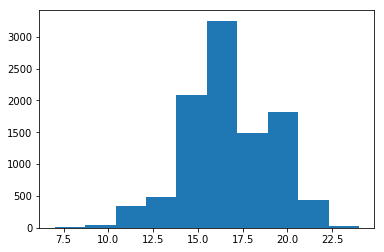

In [21]:
p_c = 0.666
p_w = 1.0 - p_c
C = stats.binom(n=25, p=p_c)
data = C.rvs(10000)
plt.hist(data)

In [35]:
np.sum(data <= 12)

398

In [36]:
v1 = data <= 12
v2 = data >= 20